<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Verzeo-Project/blob/main/VerzeoMajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # INTRODUCTION

> 1. Mount Google Drive
> 2. Installing Dependencies
> 3. Import Libraries
> 4. Data Preprocessing/ EDA
> 5. Data Visualization
> 6. Data Splitting
> 7. Modeling
> 8. Evaluation
> 9. Accuracy

###MOUNT GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

print("\nDrive is MOUNTED!!!")

Mounted at /content/drive

Drive is MOUNTED!!!


###INSTALL DEPENDENCIES

In [ ]:
!pip install --upgrade keras
!pip install -q tensorflow==2.0beta1
!pip install catboost
!pip install 
!pip help install
!pip install imblearn
!pip install vaderSentiment==3.3.2

print("\nDEPENDENCIES INSTALLED!!!")

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)
     |████████████████████████████████| 87.9MB 69kB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 3.1MB 18.6MB/s 
     |████████████████████████████████| 501kB 43.3MB/s 
     |████████████████████████████████| 66.1MB 127kB/s 
ERROR: You must give at least one requirement to install (see "pip help install")

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

Description:
  Install packages from:
  
  - PyPI (and other indexes) using requirement specifiers.
  - VCS project urls.
  - Local project directories.
  - Local or remote source archives.
  
  pip also supports installing from "req

###IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
from matplotlib import cm as cm
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
 
import time
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
 
#
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
 
#Models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
 
#Neural Networks
#from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Convolution2D, MaxPooling2D, Dense, Activation, Flatten
#from keras.callbacks import ModelCheckpoint
 
#Evaluation Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from tpot import TPOTClassifier
from tqdm import tqdm
import time
import datetime as dt
 
#Sentimental
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
 
print("\nLibraries INSTALLED!!!")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



Libraries INSTALLED!!!


###READ DATA

In [ ]:
path = '/content/drive/My Drive/Information - Information.csv'
data = pd.read_csv(path)# index_col = [0])
print("Data Shape: {}".format(data.shape))
data.head()

Data Shape: (20050, 26)


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,���It felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.590000e+17,NaN,NaN


#DATA PREPROCESSING

###RENAMING COLUMNS

In [ ]:
data.columns = ['Unit_Id', 'Golden', 'Unit_state', 'Trusted_Judgments', 'Last_Judgment_At', 'Gender', 'Gender:Confidence', 'Profile_Yn',
       'Profile_Yn:Confidence', 'Created', 'Description', 'Fav_Number', 'Gender_Gold', 'Link_Color', 'Name', 'Profile_Yn_Gold', 'ProfileImage',
       'Retweet_Count', 'Sidebar_Color', 'Text', 'Tweet_Coord', 'Tweet_Count', 'Tweet_Created', 'Tweet_Id', 'Tweet_Location', 'User_Timezone']
data.set_index('Unit_Id', inplace = True)
#data.head()
print("\nCOLUMNS RENAMED!!")


COLUMNS RENAMED!!


###DATA DETAILS

In [ ]:
data.describe()

,Trusted_Judgments,Gender:Confidence,Profile_Yn:Confidence,Fav_Number,Retweet_Count,Tweet_Count,Tweet_Id
count,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.590000e+17
std,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,1.536038e+05
min,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.590000e+17
25%,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.590000e+17
50%,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.590000e+17
75%,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.590000e+17
max,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.590000e+17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 815719226 to 815757985
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Golden                 20050 non-null  bool   
 1   Unit_state             20050 non-null  object 
 2   Trusted_Judgments      20050 non-null  int64  
 3   Last_Judgment_At       20000 non-null  object 
 4   Gender                 19953 non-null  object 
 5   Gender:Confidence      20024 non-null  float64
 6   Profile_Yn             20050 non-null  object 
 7   Profile_Yn:Confidence  20050 non-null  float64
 8   Created                20050 non-null  object 
 9   Description            16306 non-null  object 
 10  Fav_Number             20050 non-null  int64  
 11  Gender_Gold            50 non-null     object 
 12  Link_Color             20050 non-null  object 
 13  Name                   20050 non-null  object 
 14  Profile_Yn_Gold        50 non-null     obj

###LISING COUNTS OF CATEGORICAL FEATURES

In [ ]:
print(data['Gender_Gold'].value_counts(), "\n")
print(data['Profile_Yn_Gold'].value_counts(), "\n")
print(data['Tweet_Count'].value_counts(), "\n")
print(data['Tweet_Location'].value_counts(), "\n")
print(data['User_Timezone'].value_counts(), "\n")

male               19
female             14
brand              13
unknown             2
male\nunknown       1
female\nunknown     1
Name: Gender_Gold, dtype: int64 

yes    50
Name: Profile_Yn_Gold, dtype: int64 

151386     30
1          26
2372591    24
3          24
2          21
           ..
57126       1
15103       1
13054       1
4858        1
100353      1
Name: Tweet_Count, Length: 14280, dtype: int64 

London                   163
United States            142
UK                        98
USA                       97
Los Angeles, CA           69
                        ... 
Chatham, Kent              1
Trap'House                 1
Cali-4-ny- AYEEEEEEE!      1
not here                   1
None                       1
Name: Tweet_Location, Length: 7696, dtype: int64 

Eastern Time (US & Canada)    2496
Pacific Time (US & Canada)    2106
Central Time (US & Canada)    1505
London                        1307
Atlantic Time (Canada)         589
                              ... 
Ame

###FINDING NULL VALUES

In [ ]:
if data.isna().sum().sum() != 0:
  print('FOUND NULL VALUES\n')
  print(data.isna().sum())
else:
  print('CLEAN DATA')

FOUND NULL VALUES

Golden                       0
Unit_state                   0
Trusted_Judgments            0
Last_Judgment_At            50
Gender                      97
Gender:Confidence           26
Profile_Yn                   0
Profile_Yn:Confidence        0
Created                      0
Description               3744
Fav_Number                   0
Gender_Gold              20000
Link_Color                   0
Name                         0
Profile_Yn_Gold          20000
ProfileImage                 0
Retweet_Count                0
Sidebar_Color                0
Text                         0
Tweet_Coord              19891
Tweet_Count                  0
Tweet_Created                0
Tweet_Id                     0
Tweet_Location            7491
User_Timezone             7798
dtype: int64


> DROPPPING COLUMNS

In [ ]:
data.drop(['Gender_Gold', 'Profile_Yn_Gold', 'Tweet_Coord', 'Tweet_Created', 'ProfileImage', 'Link_Color', 'Name', 'Tweet_Id', 
           'Sidebar_Color', 'Tweet_Location', 'User_Timezone'], axis = 1, inplace = True)
data.dropna(axis = 0, inplace = True)
#data.head()

if data.isna().sum().sum() != 0:
  print('STILL FOUND NULL VALUES\n')
  print(data.isna().sum())
else:
  print('DATA IS CLEAN NOW')

DATA IS CLEAN NOW


###DATA CORRELATION MATRIX

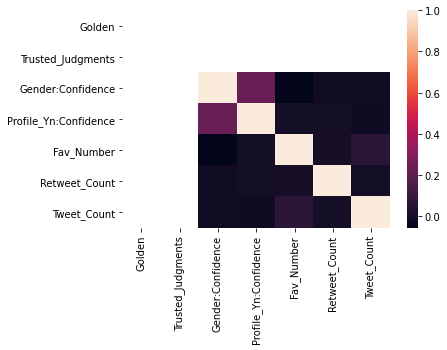

In [ ]:
import seaborn as sns

corr = data.corr()
sns.heatmap(corr)

In [ ]:
data.drop(['Golden', 'Trusted_Judgments'], axis = 1, inplace = True)

###ADDING SENTIMENTS to TWEETS and DESCRIPTIONS

In [ ]:
Neg_Description = []
Neu_Description = []
Pos_Description = []
Compound_Description = []

#i=0
for text in tqdm(data.Description):
   Neg_Description.append(vader.polarity_scores(text)['neg'])
   Neu_Description.append(vader.polarity_scores(text)['neu'])
   Pos_Description.append(vader.polarity_scores(text)['pos'])
   Compound_Description.append(vader.polarity_scores(text)['compound'])
   #i+=1
   #print(i, vader.polarity_scores(text)['neg'], vader.polarity_scores(text)['neu'],
   #      vader.polarity_scores(text)['pos'], vader.polarity_scores(text)['compound'])

data['Neg_Description'] = Neg_Description
data['Neu_Description'] = Neu_Description
data['Pos_Description'] = Pos_Description
data['Compound_Description'] = Compound_Description

data.drop(['Description'], axis = 1, inplace = True)

100%|██████████| 16180/16180 [00:05<00:00, 2881.13it/s]


In [ ]:
Neg_Text = []
Neu_Text = []
Pos_Text = []
Compound_Text = []

#i=0
for text in tqdm(data.Text):
   Neg_Text.append(vader.polarity_scores(text)['neg'])
   Neu_Text.append(vader.polarity_scores(text)['neu'])
   Pos_Text.append(vader.polarity_scores(text)['pos'])
   Compound_Text.append(vader.polarity_scores(text)['compound'])
   #i+=1
   #print(i, vader.polarity_scores(text)['neg'], vader.polarity_scores(text)['neu'],
   #      vader.polarity_scores(text)['pos'], vader.polarity_scores(text)['compound'])
  
data['Neg_Text'] = Neg_Text
data['Neu_Text'] = Neu_Text
data['Pos_Text'] = Pos_Text
data['Compound_Text'] = Compound_Text

data.drop(['Text'], axis = 1, inplace = True)

100%|██████████| 16180/16180 [00:06<00:00, 2367.71it/s]


In [ ]:
print('DATA Shape: ', data.shape)
data.head()

DATA Shape:  (16180, 18)


,Unit_state,Last_Judgment_At,Gender,Gender:Confidence,Profile_Yn,Profile_Yn:Confidence,Created,Fav_Number,Retweet_Count,Tweet_Count,Neg_Description,Neu_Description,Pos_Description,Compound_Description,Neg_Text,Neu_Text,Pos_Text,Compound_Text
Unit_Id,,,,,,,,,,,,,,,,,,
815719226,finalized,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,0,0,110964,0.000,1.000,0.000,0.0000,0.122,0.667,0.211,0.3818
815719227,finalized,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,68,0,7471,0.000,0.735,0.265,0.5574,0.000,0.752,0.248,0.6808
815719228,finalized,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,7696,1,5617,0.275,0.725,0.000,-0.2263,0.059,0.634,0.307,0.7267
815719229,finalized,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,202,0,1693,0.000,1.000,0.000,0.0000,0.000,0.890,0.110,0.3786
815719230,finalized,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,37318,0,31462,0.000,0.571,0.429,0.9477,0.000,1.000,0.000,0.0000


###ADDING DATE and TIME COLUMNS

In [ ]:
Date = []
Time = []
for date in data.Last_Judgment_At:
  Date.append(date.split()[0])
  #Time.append(date.split()[1])

data['Judgement_Date'] = Date
#data['Judgement_Time'] = Time

data['Judgement_Date'] = pd.to_datetime(data['Judgement_Date'])
data['Judgement_Date']= data['Judgement_Date'].map(dt.datetime.toordinal)

data.drop(['Last_Judgment_At'], axis = 1, inplace = True)

In [ ]:
Date = []
Time = []
for date in data.Created:
  Date.append(date.split()[0])
  Time.append(date.split()[1])

data['Created_Date'] = Date
#data['Created_Time'] = Time

data['Created_Date'] = pd.to_datetime(data['Created_Date'])
data['Created_Date']= data['Created_Date'].map(dt.datetime.toordinal)

data.drop(['Created'], axis = 1, inplace = True)

###CATEGORICAL ('GENDER' Attribute) ENCODING

In [ ]:
"""Gender = []
for gender in data.Gender:
  if gender == 'male':
    Gender.append(int(1))
  elif gender == 'female':
    Gender.append(int(2))
  else: 
    Gender.append(int(0))

data.drop(['Gender'], axis = 1, inplace = True)
data['Gender'] = Gender

data.head()"""

"Gender = []\nfor gender in data.Gender:\n  if gender == 'male':\n    Gender.append(int(1))\n  elif gender == 'female':\n    Gender.append(int(2))\n  else: \n    Gender.append(int(0))\n\ndata.drop(['Gender'], axis = 1, inplace = True)\ndata['Gender'] = Gender\n\ndata.head()"

In [ ]:
data['Gender'].value_counts()

female     5710
male       5452
brand      4316
unknown     702
Name: Gender, dtype: int64

In [ ]:
data = data[data['Gender'] != 'unknown']
data = data[data['Gender'] != 'brand']
data['Gender'].value_counts()

female    5710
male      5452
Name: Gender, dtype: int64

In [ ]:
data[['Unit_state', 'Profile_Yn']] = pd.get_dummies(data[['Unit_state', 'Profile_Yn']])
data.head()

,Unit_state,Gender,Gender:Confidence,Profile_Yn,Profile_Yn:Confidence,Fav_Number,Retweet_Count,Tweet_Count,Neg_Description,Neu_Description,Pos_Description,Compound_Description,Neg_Text,Neu_Text,Pos_Text,Compound_Text,Judgement_Date,Created_Date
Unit_Id,,,,,,,,,,,,,,,,,,
815719226,1,male,1.0000,1,1.0,0,0,110964,0.000,1.000,0.000,0.0000,0.122,0.667,0.211,0.3818,735897,735207
815719227,1,male,1.0000,1,1.0,68,0,7471,0.000,0.735,0.265,0.5574,0.000,0.752,0.248,0.6808,735897,734777
815719228,1,male,0.6625,1,1.0,7696,1,5617,0.275,0.725,0.000,-0.2263,0.059,0.634,0.307,0.7267,735897,735565
815719229,1,male,1.0000,1,1.0,202,0,1693,0.000,1.000,0.000,0.0000,0.000,0.890,0.110,0.3786,735897,733569
815719230,1,female,1.0000,1,1.0,37318,0,31462,0.000,0.571,0.429,0.9477,0.000,1.000,0.000,0.0000,735898,735339


In [ ]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['Gender']= label_encoder.fit_transform(data['Gender']) 
data.head()

,Unit_state,Gender,Gender:Confidence,Profile_Yn,Profile_Yn:Confidence,Fav_Number,Retweet_Count,Tweet_Count,Neg_Description,Neu_Description,Pos_Description,Compound_Description,Neg_Text,Neu_Text,Pos_Text,Compound_Text,Judgement_Date,Created_Date
Unit_Id,,,,,,,,,,,,,,,,,,
815719226,1,1,1.0000,1,1.0,0,0,110964,0.000,1.000,0.000,0.0000,0.122,0.667,0.211,0.3818,735897,735207
815719227,1,1,1.0000,1,1.0,68,0,7471,0.000,0.735,0.265,0.5574,0.000,0.752,0.248,0.6808,735897,734777
815719228,1,1,0.6625,1,1.0,7696,1,5617,0.275,0.725,0.000,-0.2263,0.059,0.634,0.307,0.7267,735897,735565
815719229,1,1,1.0000,1,1.0,202,0,1693,0.000,1.000,0.000,0.0000,0.000,0.890,0.110,0.3786,735897,733569
815719230,1,0,1.0000,1,1.0,37318,0,31462,0.000,0.571,0.429,0.9477,0.000,1.000,0.000,0.0000,735898,735339


###NEW CONFUSION MATRIX

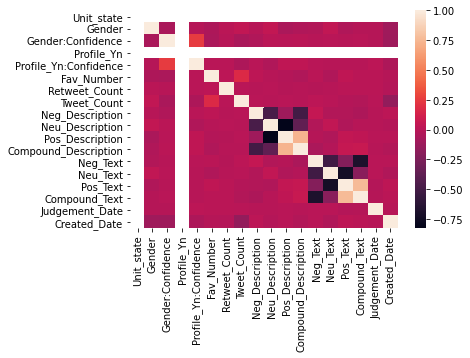

In [ ]:
import seaborn as sns

corr = data.corr()
sns.heatmap(corr)

In [ ]:
data.drop(['Unit_state', 'Profile_Yn'], axis = 1, inplace = True)

#QUESTIONS

###Q1. What are the most common emotions/words used by Males and Females?

> For text in FEATURE 'DESCRIPTION'

In [ ]:
print("Emotions: Neg: ", data['Neg_Description'].sum()," Neu: ", data['Neu_Description'].sum()," Pos: ", data['Pos_Description'].sum()," :: Most People have expressed a POSITIVE EMOTION")

Emotions: Neg:  549.878  Neu:  9079.810000000001  Pos:  1532.315  :: Most People have expressed a POSITIVE EMOTION


> For text in FEATURE 'TEXT'


In [ ]:
print("Emotions: Neg: ", data['Neg_Text'].sum()," Neu: ", data['Neu_Text'].sum()," Pos: ", data['Pos_Text'].sum()," :: Most People have expressed a NEUTRAL EMOTION")

Emotions: Neg:  807.2559999999999  Neu:  8927.741999999998  Pos:  1426.963  :: Most People have expressed a NEUTRAL EMOTION


###Q2. Which gender makes more typos in their tweets?

In [ ]:
data.groupby('Gender')['Tweet_Count'].sum() #0: Female #1: Male

Gender
0    157181381
1    184712111
Name: Tweet_Count, dtype: int64

In [ ]:
#data.index[data['Tweet_Count'] == data['Tweet_Count'].max()].to_list() ###[815735441]
for index, value in data['Tweet_Count'].items():
  if value == data['Tweet_Count'].max():
    print("{} have done MAXIMUM TWEETS with MAX COUNT {} and TOTAL COUNT {} at index {}".format('MALES', data['Tweet_Count'].max(), data.groupby('Gender')['Tweet_Count'].sum()[1],index))

MALES have done MAXIMUM TWEETS with MAX COUNT 2680199 and TOTAL COUNT 184712111 at index 815735441


#DATA VISUALIZATION

In [ ]:
import plotly.express as px
from matplotlib.pyplot import figure

In [ ]:
fig = px.scatter_matrix(data, dimensions=["Gender", "Retweet_Count", "Tweet_Count"], color="Tweet_Count")
fig.show()

In [ ]:
fig = px.parallel_coordinates(data, color="Tweet_Count", labels={"Gender":"Gender", 
                                                                 "Retweet_Count":"Retweet_Count", 
                                                                 "Tweet_Count":"Tweet_Count"},
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=data.values)])
fig.update_layout(title='TWEETS ANALYSIS', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

#DATA SPLITTING

In [ ]:
"""data[['Gender:Confidence', 'Neg_Description', 'Neu_Description', 'Pos_Description', 'Compound_Description', 
      'Neg_Text', 'Neu_Text', 'Pos_Text', 'Compound_Text']] = data[['Gender:Confidence', 'Neg_Description', 'Neu_Description', 'Pos_Description', 'Compound_Description', 
      'Neg_Text', 'Neu_Text', 'Pos_Text', 'Compound_Text']].astype(np.float64)"""

"data[['Gender:Confidence', 'Neg_Description', 'Neu_Description', 'Pos_Description', 'Compound_Description', \n      'Neg_Text', 'Neu_Text', 'Pos_Text', 'Compound_Text']] = data[['Gender:Confidence', 'Neg_Description', 'Neu_Description', 'Pos_Description', 'Compound_Description', \n      'Neg_Text', 'Neu_Text', 'Pos_Text', 'Compound_Text']].astype(np.float64)"

In [ ]:
Y = data['Gender'].values
X = data.drop('Gender', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
print("X_train.shape: ",X_train.shape, "X_test.shape: ",X_test.shape,"Y_train.shape: ", Y_train.shape, "Y_test.shape: ",Y_test.shape)

X_train.shape:  (8929, 15) X_test.shape:  (2233, 15) Y_train.shape:  (8929,) Y_test.shape:  (2233,)


In [ ]:
import statsmodels.api as sm
X_Opt = np.append(arr = np.ones((X_train.shape[0], 1)), values = X_train, axis = 1)
regressor_OLS = sm.OLS(Y_train, X_Opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     14.93
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           9.68e-39
Time:                        12:48:03   Log-Likelihood:                -6366.8
No. Observations:                8929   AIC:                         1.277e+04
Df Residuals:                    8913   BIC:                         1.288e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5149.4726   7700.854      0.669      0.5

In [ ]:
data.columns

Index(['Gender', 'Gender:Confidence', 'Profile_Yn:Confidence', 'Fav_Number',
       'Retweet_Count', 'Tweet_Count', 'Neg_Description', 'Neu_Description',
       'Pos_Description', 'Compound_Description', 'Neg_Text', 'Neu_Text',
       'Pos_Text', 'Compound_Text', 'Judgement_Date', 'Created_Date'],
      dtype='object')

#MODELLING

In [ ]:
ACCURACY = {}
EVALUATION = {}

> 1. ENSEMBLE Model with Cross Validation
> 2. Support Vector Machine
> 3. LinearSVM
> 4. Naive Bayes
> 5. Decison Tree
> 6. Decision Tree Bagging
> 7. Extra Tree Classifier
> 8. Gradient Descent
> 9. Stoichastic Gradient Descent
> 10. SGD with StandardScaler and Pipelining
> 11. XGBOOST
> 12. ADABOOST
> 13. CATBOOST
> 14. Genetic Algorithm

###ENSEMBLE MODELLING USING CROSS VALIDATION

In [ ]:
models_list = []
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('SVM', SVC(C=1.7, kernel='rbf'))) 
models_list.append(('NB', GaussianNB()))
models_list.append(('DT', DecisionTreeClassifier(criterion='entropy')))
models_list.append(('BAG', BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)))
models_list.append(('ET', ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2)))
models_list.append(('RF', RandomForestClassifier(criterion='entropy')))
models_list.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)))
models_list.append(('XGB', XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)))
models_list.append(('ADB', AdaBoostClassifier()))
models_list.append(('CATB', CatBoostClassifier()))

In [ ]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6876438	total: 51.4ms	remaining: 7.29s
7:	learn: 0.6868571	total: 58.5ms	remaining: 7.25s
8:	learn: 0.6861411	total: 65.5ms	remaining: 7.21s
9:	learn: 0.6853669	total: 72.4ms	remaining: 7.17s
10:	learn: 0.6846714	total: 79.4ms	remaining: 7.14s
11:	learn: 0.6840170	total: 91.4ms	remaining: 7.52s
12:	learn: 0.6832380	total: 98.8ms	remaining: 7.5s
13:	learn: 0.6827566	total: 106ms	remaining: 7.45s
14:	learn: 0.6822039	total: 113ms	remaining: 7.41s
15:	learn: 0.6815189	total: 120ms	remaining: 7.38s
16:	learn: 0.6808551	total: 127ms	remaining: 7.36s
17:	learn: 0.6802397	total: 134ms	remaining: 7.32s
18:	learn: 0.6795844	total: 141ms	remaining: 7.3s
19:	learn: 0.6790262	total: 149ms	remaining: 7.28s
20:	learn: 0.6784341	total: 155ms	remaining: 7.24s
21:	learn: 0.6778214	total: 162ms	remaining: 7.21s
22:	learn: 0.6773766	total: 170ms	remaining: 7.21s
23:	learn: 0.6769546	total: 177ms	remaining: 7.19s
24:	learn: 0.6764852	total: 18

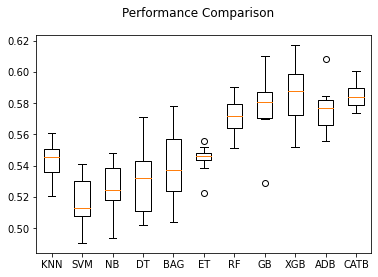

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

PIPELINING

In [ ]:
# Standardize the dataset
pipelines = []

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(C=1.7, kernel='rbf'))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier(criterion='entropy'))])))
pipelines.append(('ScaledBAG', Pipeline([('Scaler', StandardScaler()),('BAG', BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5))])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(criterion='entropy'))])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1))])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('GB', XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75))])))
pipelines.append(('ScaledADB', Pipeline([('Scaler', StandardScaler()),('ADB', AdaBoostClassifier())])))
pipelines.append(('ScaledCATB', Pipeline([('Scaler', StandardScaler()),('CATB', CatBoostClassifier())])))

results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6876438	total: 51ms	remaining: 7.23s
7:	learn: 0.6868571	total: 58ms	remaining: 7.19s
8:	learn: 0.6861411	total: 65.1ms	remaining: 7.17s
9:	learn: 0.6853669	total: 72ms	remaining: 7.13s
10:	learn: 0.6846714	total: 79.1ms	remaining: 7.11s
11:	learn: 0.6840170	total: 86.1ms	remaining: 7.09s
12:	learn: 0.6832380	total: 93.3ms	remaining: 7.08s
13:	learn: 0.6827566	total: 100ms	remaining: 7.07s
14:	learn: 0.6822039	total: 110ms	remaining: 7.22s
15:	learn: 0.6815189	total: 117ms	remaining: 7.21s
16:	learn: 0.6808551	total: 124ms	remaining: 7.19s
17:	learn: 0.6802397	total: 131ms	remaining: 7.17s
18:	learn: 0.6795844	total: 139ms	remaining: 7.16s
19:	learn: 0.6790262	total: 146ms	remaining: 7.13s
20:	learn: 0.6784341	total: 153ms	remaining: 7.13s
21:	learn: 0.6778214	total: 160ms	remaining: 7.11s
22:	learn: 0.6773766	total: 167ms	remaining: 7.09s
23:	learn: 0.6769546	total: 174ms	remaining: 7.09s
24:	learn: 0.6764852	total: 181ms	

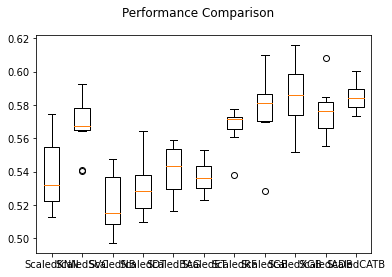

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###SVM

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.569154 using {'C': 2.0, 'kernel': 'rbf'}
0.566693 (0.014035) with: {'C': 0.1, 'kernel': 'linear'}
0.540372 (0.016291) with: {'C': 0.1, 'kernel': 'poly'}
0.567026 (0.011682) with: {'C': 0.1, 'kernel': 'rbf'}
0.534776 (0.011024) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.567030 (0.013535) with: {'C': 0.3, 'kernel': 'linear'}
0.559074 (0.014953) with: {'C': 0.3, 'kernel': 'poly'}
0.567586 (0.013824) with: {'C': 0.3, 'kernel': 'rbf'}
0.529171 (0.019296) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.566693 (0.013870) with: {'C': 0.5, 'kernel': 'linear'}
0.560754 (0.015677) with: {'C': 0.5, 'kernel': 'poly'}
0.567586 (0.014293) with: {'C': 0.5, 'kernel': 'rbf'}
0.525362 (0.019012) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.566693 (0.013806) with: {'C': 0.7, 'kernel': 'linear'}
0.560755 (0.015314) with: {'C': 0.7, 'kernel': 'poly'}
0.568930 (0.011229) with: {'C': 0.7, 'kernel': 'rbf'}
0.526819 (0.014615) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.566806 (0.013933) with: {'C': 0.9, 'kernel': 'linear'

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
SVM = SVC(C=grid_result.best_params_['C'], kernel=grid_result.best_params_['kernel'])
start = time.time()
SVM.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 5.209440


In [ ]:
# estimate accuracy on validation dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
SVMPred = SVM.predict(X_test_scaled)

print(confusion_matrix(Y_test, SVMPred))

[[687 443]
 [546 557]]


In [ ]:
accuracy = accuracy_score(Y_test, SVMPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, SVMPred))

Accuracy: 55.71%
              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1130
           1       0.56      0.50      0.53      1103

    accuracy                           0.56      2233
   macro avg       0.56      0.56      0.56      2233
weighted avg       0.56      0.56      0.56      2233



In [ ]:
ACCURACY['SVM'] = accuracy
EVALUATION['SVM'] = list(SVMPred)

###LinearSVC

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
LSVC = LinearSVC()
start = time.time()
LSVC.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 1.027549


In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
LSVCPred = LSVC.predict(X_test_scaled)
LSVC.fit(X_test_scaled, Y_test)
print(confusion_matrix(Y_test, LSVCPred))

[[692 438]
 [536 567]]


In [ ]:
accuracy = accuracy_score(Y_test, LSVCPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, LSVCPred))

Accuracy: 56.38%
              precision    recall  f1-score   support

           0       0.56      0.61      0.59      1130
           1       0.56      0.51      0.54      1103

    accuracy                           0.56      2233
   macro avg       0.56      0.56      0.56      2233
weighted avg       0.56      0.56      0.56      2233



In [ ]:
ACCURACY['LinearSVC'] = accuracy
EVALUATION['LinearSVC'] = list(LSVCPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator= LinearSVC(), n_features_to_select=5)
model = LinearSVC()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator= LinearSVC(), n_features_to_select=i)
		model = LinearSVC()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=7, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###CALIBERATED CLASSIFIER

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
CCCV = CalibratedClassifierCV(base_estimator = LSVC)
start = time.time()
CCCV.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
CCCVPred = CCCV.predict(X_test_scaled)
CCCV.fit(X_test_scaled, Y_test)
print(confusion_matrix(Y_test, CCCVPred))

In [ ]:
accuracy = accuracy_score(Y_test, CCCVPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, CCCVPred))

In [ ]:
ACCURACY['CaliberatedVC'] = accuracy
EVALUATION['CaliberatedVC'] = list(CCCVPred)

###NB

In [ ]:
NB = GaussianNB()
NB.fit(X_train,Y_train)
NBPred = NB.predict(X_test)
NB.score(X_test, Y_test)
NB.fit(X_test, Y_test)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
cm = confusion_matrix(Y_test, NBPred)
print(cm)

[[1083   47]
 [1001  102]]


In [ ]:
accuracy = accuracy_score(Y_test, NBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, NBPred))

Accuracy: 53.07%
              precision    recall  f1-score   support

           0       0.52      0.96      0.67      1130
           1       0.68      0.09      0.16      1103

    accuracy                           0.53      2233
   macro avg       0.60      0.53      0.42      2233
weighted avg       0.60      0.53      0.42      2233



In [ ]:
ACCURACY['NB'] = accuracy
EVALUATION['NB'] = list(NBPred)

###DECISION TREE

In [ ]:
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,Y_train)
DTPred = DT.predict(X_test)
DT.score(X_test, Y_test)
DT.fit(X_test, Y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
cm = confusion_matrix(Y_test, DTPred)
print(cm)

[[638 492]
 [553 550]]


In [ ]:
accuracy = accuracy_score(Y_test, DTPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, DTPred))

Accuracy: 53.20%
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1130
           1       0.53      0.50      0.51      1103

    accuracy                           0.53      2233
   macro avg       0.53      0.53      0.53      2233
weighted avg       0.53      0.53      0.53      2233



In [ ]:
ACCURACY['DT'] = accuracy
EVALUATION['DT'] = list(DTPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###DECISON TREE BAGGING

In [ ]:
Bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)
Bagging.fit(X_train, Y_train)
BPred = Bagging.predict(X_test)
Bagging.score(X_test, Y_test)

0.5629198387819078

In [ ]:
cm = confusion_matrix(Y_test, BPred)
print(cm)

[[782 348]
 [628 475]]


In [ ]:
accuracy = accuracy_score(Y_test, BPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, BPred))

Accuracy: 56.29%
              precision    recall  f1-score   support

           0       0.55      0.69      0.62      1130
           1       0.58      0.43      0.49      1103

    accuracy                           0.56      2233
   macro avg       0.57      0.56      0.55      2233
weighted avg       0.57      0.56      0.56      2233



In [ ]:
ACCURACY['Bagging'] = accuracy
EVALUATION['Bagging'] = list(BPred)

###EXTRA TREE CLASSFIER

In [ ]:
ET = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
ET.fit(X_train, Y_train)
ET.score(X_train, Y_train)
ETPred = ET.predict(X_test)
ET.score(X_test, Y_test)

0.5382892969099866

In [ ]:
cm = confusion_matrix(Y_test, ETPred)
print(cm)

[[743 387]
 [644 459]]


In [ ]:
accuracy = accuracy_score(Y_test, ETPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, ETPred))

Accuracy: 53.83%
              precision    recall  f1-score   support

           0       0.54      0.66      0.59      1130
           1       0.54      0.42      0.47      1103

    accuracy                           0.54      2233
   macro avg       0.54      0.54      0.53      2233
weighted avg       0.54      0.54      0.53      2233



In [ ]:
ACCURACY['ExtraTree'] = accuracy
EVALUATION['ExtraTree'] = list(ETPred)

###GRADIANT BOOSTING CLASSIFIER

In [ ]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GB.fit(X_train, Y_train)
GBPred = GB.predict(X_test)
#GB.score(X_test, Y_test)
GB.fit(X_test, Y_test)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
cm = confusion_matrix(Y_test, GBPred)
print(cm)

[[698 432]
 [538 565]]


In [ ]:
accuracy = accuracy_score(Y_test, GBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, GBPred))

Accuracy: 56.56%
              precision    recall  f1-score   support

           0       0.56      0.62      0.59      1130
           1       0.57      0.51      0.54      1103

    accuracy                           0.57      2233
   macro avg       0.57      0.56      0.56      2233
weighted avg       0.57      0.57      0.56      2233



In [ ]:
ACCURACY['GB'] = accuracy
EVALUATION['GB'] = list(GBPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1), n_features_to_select=5)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1), n_features_to_select=i)
		model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###STOICHASTIC GRADIANT DESCENT CLASSIFIER

In [ ]:
SGDC = SGDClassifier()
SGDC.fit(X_train, Y_train)
SGDCPred = SGDC.predict(X_test)
#SGDC.score(X_test, Y_test)
SGDC.fit(X_test, Y_test)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
cm = confusion_matrix(Y_test, SGDCPred)
print(cm)

[[1127    3]
 [1088   15]]


In [ ]:
accuracy = accuracy_score(Y_test, SGDCPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, SGDCPred))

Accuracy: 51.14%
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      1130
           1       0.83      0.01      0.03      1103

    accuracy                           0.51      2233
   macro avg       0.67      0.51      0.35      2233
weighted avg       0.67      0.51      0.35      2233



In [ ]:
ACCURACY['SGDC'] = accuracy
EVALUATION['SGDC'] = list(SGDCPred)

###SGDCLASSIFIER with STANDARDSCALER and PIPELING

In [ ]:
SGD = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
SGD.fit(X_train, Y_train)
SGDPred = SGD.predict(X_test)
#SGD.score(X_test, Y_test)
SGD.fit(X_test, Y_test)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
cm = confusion_matrix(Y_test, SGDPred)
print(cm)

[[649 481]
 [545 558]]


In [ ]:
accuracy = accuracy_score(Y_test, SGDPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, SGDPred))

Accuracy: 54.05%
              precision    recall  f1-score   support

           0       0.54      0.57      0.56      1130
           1       0.54      0.51      0.52      1103

    accuracy                           0.54      2233
   macro avg       0.54      0.54      0.54      2233
weighted avg       0.54      0.54      0.54      2233



In [ ]:
ACCURACY['SGD'] = accuracy
EVALUATION['SGD'] = list(SGDPred)

###RANDOM FOREST

In [ ]:
RF = RandomForestClassifier(criterion='entropy')
RF.fit(X_train,Y_train)
RFPred = RF.predict(X_test)
RF.score(X_test, Y_test)
RF.fit(X_test, Y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
cm = confusion_matrix(Y_test, RFPred)
print(cm)

[[698 432]
 [518 585]]


In [ ]:
accuracy = accuracy_score(Y_test, RFPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, RFPred))

Accuracy: 57.46%
              precision    recall  f1-score   support

           0       0.57      0.62      0.60      1130
           1       0.58      0.53      0.55      1103

    accuracy                           0.57      2233
   macro avg       0.57      0.57      0.57      2233
weighted avg       0.57      0.57      0.57      2233



In [ ]:
ACCURACY['RF'] = accuracy
EVALUATION['RF'] = list(RFPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator= RandomForestClassifier(criterion='entropy', random_state=0), n_features_to_select=5)
model = RandomForestClassifier(criterion='entropy', random_state=0)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator=RandomForestClassifier(criterion='entropy'), n_features_to_select=i)
		model = RandomForestClassifier(criterion='entropy')
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###XGBOOST

In [ ]:
XGB = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
XGB.fit(X_train, Y_train, verbose=False)
XGBPred = XGB.predict(X_test)
XGB.fit(X_test, Y_test, verbose=False)
#XGB.score(X_test, Y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.08, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=1)

In [ ]:
cm = confusion_matrix(Y_test, XGBPred)
print(cm)

[[723 407]
 [523 580]]


In [ ]:
accuracy = accuracy_score(Y_test, XGBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, XGBPred))

Accuracy: 58.35%
              precision    recall  f1-score   support

           0       0.58      0.64      0.61      1130
           1       0.59      0.53      0.56      1103

    accuracy                           0.58      2233
   macro avg       0.58      0.58      0.58      2233
weighted avg       0.58      0.58      0.58      2233



In [ ]:
ACCURACY['XGB'] = accuracy
EVALUATION['XGB'] = list(XGBPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator= XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75), n_features_to_select=5)
model = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator= XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75), n_features_to_select=i)
		model = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###ADABOOST

In [ ]:
ADAB = AdaBoostClassifier()
ADAB.fit(X_train, Y_train)
ADABPred = ADAB.predict(X_test)
ADAB.fit(X_test, Y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
cm = confusion_matrix(Y_test, ADABPred)
print(cm)

[[730 400]
 [519 584]]


In [ ]:
accuracy = accuracy_score(Y_test, ADABPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, ADABPred))

Accuracy: 58.84%
              precision    recall  f1-score   support

           0       0.58      0.65      0.61      1130
           1       0.59      0.53      0.56      1103

    accuracy                           0.59      2233
   macro avg       0.59      0.59      0.59      2233
weighted avg       0.59      0.59      0.59      2233



In [ ]:
ACCURACY['ADB'] = accuracy
EVALUATION['ADB'] = list(ADABPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator=AdaBoostClassifier(), n_features_to_select=5)
model = AdaBoostClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator= AdaBoostClassifier(), n_features_to_select=i)
		model = AdaBoostClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###CATBOOST

In [ ]:
CDAB = CatBoostClassifier()
CDAB.fit(X_train, Y_train)
CDABPred = ADAB.predict(X_test)
CDAB.fit(X_test, Y_test)

Learning rate set to 0.026238
0:	learn: 0.6921721	total: 10.4ms	remaining: 10.3s
1:	learn: 0.6912700	total: 18ms	remaining: 8.98s
2:	learn: 0.6905150	total: 25.5ms	remaining: 8.48s
3:	learn: 0.6895486	total: 33.7ms	remaining: 8.4s
4:	learn: 0.6887461	total: 41.5ms	remaining: 8.25s
5:	learn: 0.6879912	total: 49ms	remaining: 8.11s
6:	learn: 0.6872753	total: 56.6ms	remaining: 8.03s
7:	learn: 0.6864274	total: 64.2ms	remaining: 7.96s
8:	learn: 0.6856505	total: 71.8ms	remaining: 7.91s
9:	learn: 0.6848855	total: 79.5ms	remaining: 7.87s
10:	learn: 0.6842452	total: 86.9ms	remaining: 7.81s
11:	learn: 0.6834639	total: 94.9ms	remaining: 7.81s
12:	learn: 0.6828365	total: 103ms	remaining: 7.79s
13:	learn: 0.6821424	total: 110ms	remaining: 7.78s
14:	learn: 0.6815224	total: 118ms	remaining: 7.76s
15:	learn: 0.6808608	total: 126ms	remaining: 7.75s
16:	learn: 0.6803912	total: 133ms	remaining: 7.72s
17:	learn: 0.6799070	total: 141ms	remaining: 7.69s
18:	learn: 0.6794034	total: 149ms	remaining: 7.68s
19:	

In [ ]:
cm = confusion_matrix(Y_test, CDABPred)
print(cm)

[[778 352]
 [441 662]]


In [ ]:
accuracy = accuracy_score(Y_test, CDABPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, CDABPred))

Accuracy: 64.49%
              precision    recall  f1-score   support

           0       0.64      0.69      0.66      1130
           1       0.65      0.60      0.63      1103

    accuracy                           0.64      2233
   macro avg       0.65      0.64      0.64      2233
weighted avg       0.65      0.64      0.64      2233



In [ ]:
ACCURACY['CATB'] = accuracy
EVALUATION['CATB'] = list(CDABPred)

###GENETIC ALGORITHM

In [ ]:
!pip install tpot

     |████████████████████████████████| 92kB 2.5MB/s 
     |████████████████████████████████| 163kB 8.3MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=295230dd187995f3d39aa25a54025759f854e3c1614f1c208c891de8a59c59dd
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier

TPOT = TPOTClassifier()
TPOT.fit(X_train, Y_train)

TPOT_pred = TPOT.predict(X_test)

In [ ]:
TPOTPred = TPOT_pred

In [ ]:
accuracy = accuracy_score(Y_test, TPOTPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.04%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, TPOTPred))
print(classification_report(Y_test, TPOTPred))

Accuracy score 0.580385
              precision    recall  f1-score   support

           0       0.58      0.63      0.60      1130
           1       0.58      0.53      0.55      1103

    accuracy                           0.58      2233
   macro avg       0.58      0.58      0.58      2233
weighted avg       0.58      0.58      0.58      2233



In [ ]:
ACCURACY['TPOT'] = accuracy
EVALUATION['TPOT'] = list(TPOTPred)

#EVALUATION

In [ ]:
EVALUATION = pd.DataFrame(EVALUATION)
EVALUATION

,SVM,LinearSVC,NB,DT,Bagging,ExtraTree,GB,SGDC,SGD,RF,XGB,ADB,CATB,TPOT
0,1,1,0,1,0,0,0,0,1,1,1,0,0,1
1,1,1,0,0,1,1,1,0,1,1,1,1,0,1
2,1,1,0,0,0,0,1,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,1,1,0,1,0,1,1,0,1,1,1,1,1,1
2229,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2230,1,0,0,0,1,0,1,0,0,1,1,1,0,0
2231,0,0,0,1,0,0,0,0,1,0,0,0,0,0


#SUMMARY with ACCURACY

In [ ]:
ACCURACY = pd.DataFrame(ACCURACY, index = [0]).T
ACCURACY.columns = [''] * len(ACCURACY.columns)
ACCURACY

,
SVM,0.557098
LinearSVC,0.563815
NB,0.530676
DT,0.532020
Bagging,0.562920
ExtraTree,0.538289
GB,0.565607
SGDC,0.511420
SGD,0.540528
RF,0.574563


In [ ]:
print("From the evaluation of ALGORITHMS it is clear that CATBOOST has best model with {:.3f} accuracy".format(ACCURACY.max().max()*100))

From the evaluation of ALGORITHMS it is clear that CATBOOST has best model with 64.487 accuracy


> ## MODELS PLOTS


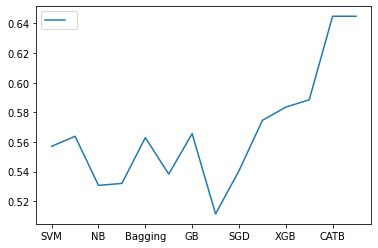

In [ ]:
ACCURACY.plot()

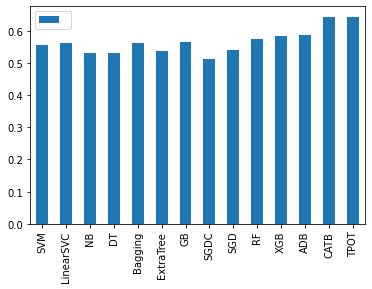

In [ ]:
ACCURACY.plot.bar()